# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [111]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] - 273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 3 of Set 1 | bela
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | kostomuksha
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | keflavik
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | salalah
Processing Record 12 of Set 1 | nanao
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | nezhinka
Processing Record 17 of Set 1 | waitangi
Processing Record 18 of Set 1 | fu'an
Processing Record 19 of Set 1 | shizunai-furukawacho
Processing Record 20 of Set 1 | elmendorf air force base
City not found. Skipping...
Processing Record 21 of Set 1 | bilib

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)  

# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,-1.88,72,73,19.74,TF,1722037152
1,bela,25.9333,81.9833,30.99,67,97,3.84,IN,1722037155
2,port elizabeth,-33.9180,25.5701,10.17,94,0,1.03,ZA,1722037156
3,kostomuksha,64.5710,30.5767,16.08,77,18,1.97,RU,1722037157
4,hithadhoo,-0.6000,73.0833,28.92,72,95,4.40,MV,1722037158


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

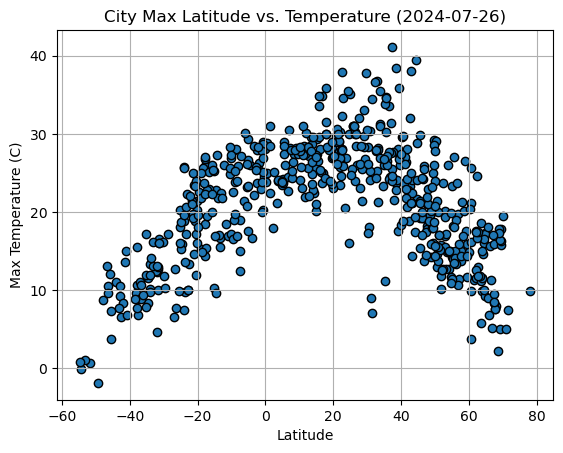

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title(f"City Max Latitude vs. Temperature (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

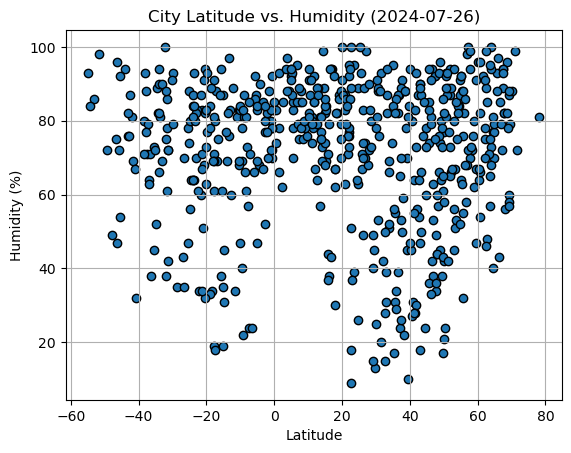

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs. Humidity (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

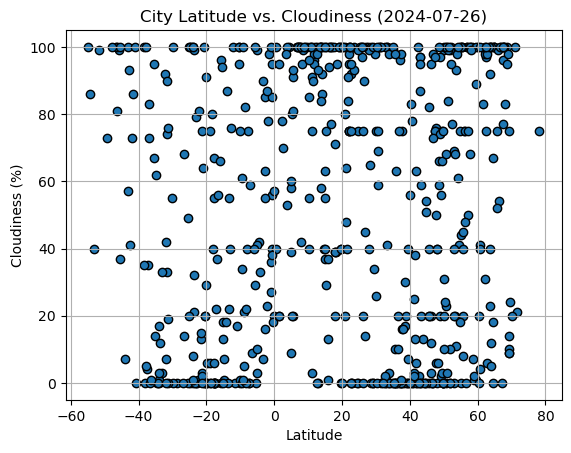

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs. Cloudiness (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

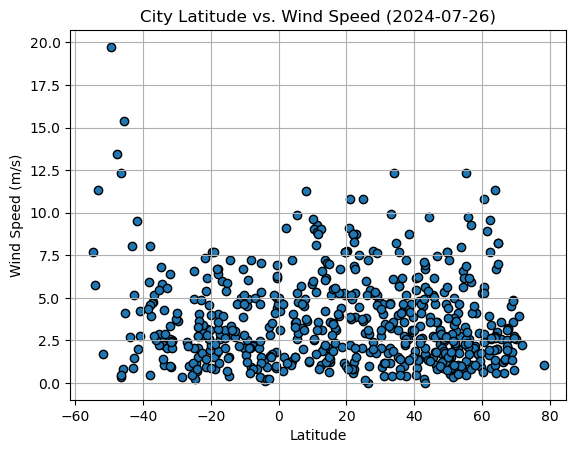

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs. Wind Speed (2024-07-26)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [102]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate the regression line
    regression_line = slope * np.array(x_values) + intercept
    
    # Output R-squared value to the terminal
    r_squared = r_value**2
    print(f'The r^2 value is: {r_squared:}')
    
    # Create scatter plot
    plt.scatter(x_values, y_values, label='Data Points')
    
    # Plot regression line in red
    plt.plot(x_values, regression_line, color='red', label='Linear Regression')
    
    # Add the regression equation to the plot in red
    plt.annotate(f'$y = {slope:.2f}x + {intercept:.2f}$', 
                 xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, color='red',
                 verticalalignment='top', horizontalalignment='left')
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemisphere_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bela,25.9333,81.9833,30.99,67,97,3.84,IN,1722037155
3,kostomuksha,64.5710,30.5767,16.08,77,18,1.97,RU,1722037157
6,albany,42.6001,-73.9662,23.27,54,2,4.49,US,1722036980
7,keflavik,64.0049,-22.5624,9.95,100,100,6.69,IS,1722037162
9,salalah,17.0151,54.0924,25.05,94,100,3.09,OM,1722037164


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemisphere_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemisphere_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,-1.88,72,73,19.74,TF,1722037152
2,port elizabeth,-33.9180,25.5701,10.17,94,0,1.03,ZA,1722037156
4,hithadhoo,-0.6000,73.0833,28.92,72,95,4.40,MV,1722037158
5,lebu,-37.6167,-73.6500,6.82,71,4,3.92,CL,1722037159
8,bredasdorp,-34.5322,20.0403,8.35,89,0,2.64,ZA,1722037163


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.4368703533797879


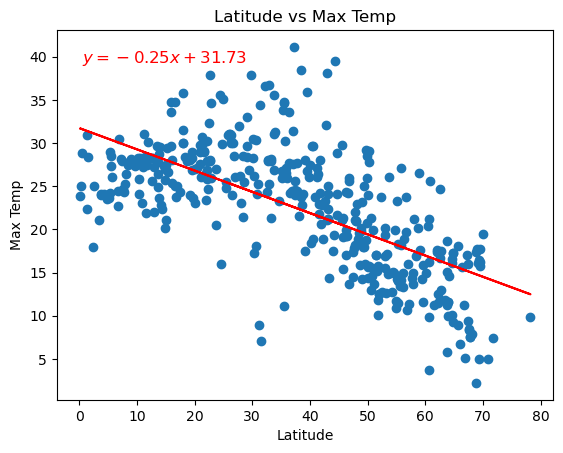

In [103]:
# Linear regression on Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp', "Latitude vs Max Temp")


The r^2 value is: 0.6536311674464663


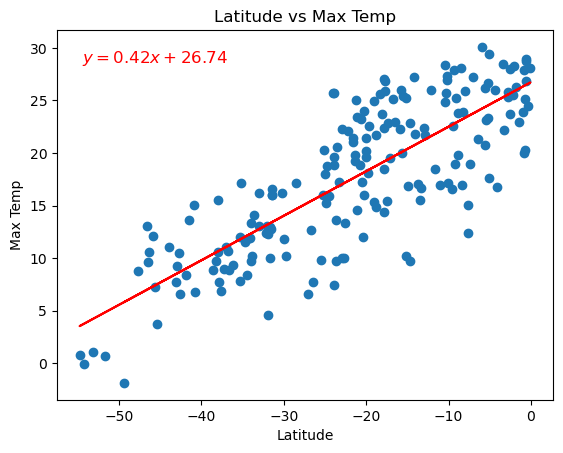

In [104]:
# Linear regression on Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Max Temp']

plot_linear_regression(x_values, y_values, 'Latitude', 'Max Temp', "Latitude vs Max Temp")

**Discussion about the linear relationship:** 
The relationship between latitude and maximum temperature differs between the hemispheres. In the Southern Hemisphere, there is a positive correlation, as shown by the equation y=0.42x+26.74 and an R-squared of 0.65, indicating that temperatures increase as latitude moves closer to the equator. Conversely, in the Northern Hemisphere, there is a negative correlation, indicated by the equation y=−0.25x+31.73 and an R-squared of 0.44, suggesting that temperatures decrease with increasing latitude. The higher R-squared in the Southern Hemisphere suggests latitude is a better predictor of temperature there compared to the Northern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.00575641082634823


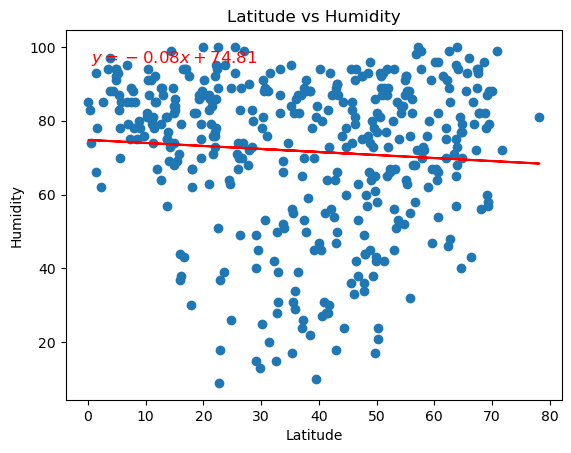

In [112]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', "Latitude vs Humidity")

The r^2 value is: 0.0032420235870260733


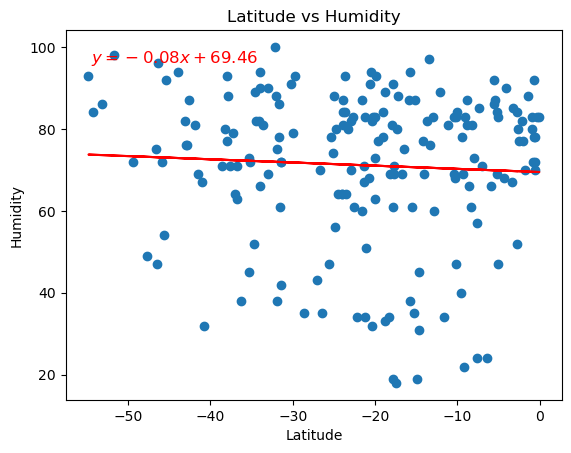

In [113]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Humidity']

plot_linear_regression(x_values, y_values, 'Latitude', 'Humidity', "Latitude vs Humidity")

**Discussion about the linear relationship:**
The scatter plots illustrating the relationship between latitude and humidity in both hemispheres reveal very weak correlations, as indicated by the low R-squared values (0.0057 in the Northern Hemisphere and 0.0032 in the Southern Hemisphere). In the Northern Hemisphere, the regression equation
y=0.08x+74.81 suggests a slight increase in humidity with increasing latitude, while in the Southern Hemisphere, the equation y=−0.08x+69.46 suggests a slight decrease. However, the near-zero slope coefficients and the scattering of data points suggest that latitude alone is not a strong predictor of humidity levels in either hemisphere, with other factors likely playing more substantial roles.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.018896800625441527


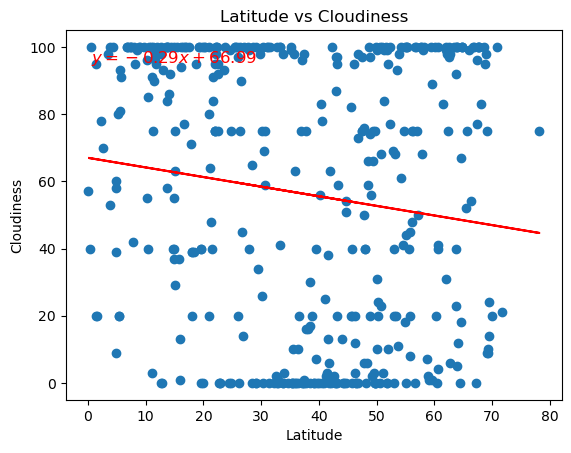

In [114]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', "Latitude vs Cloudiness")

The r^2 value is: 0.015042968362880767


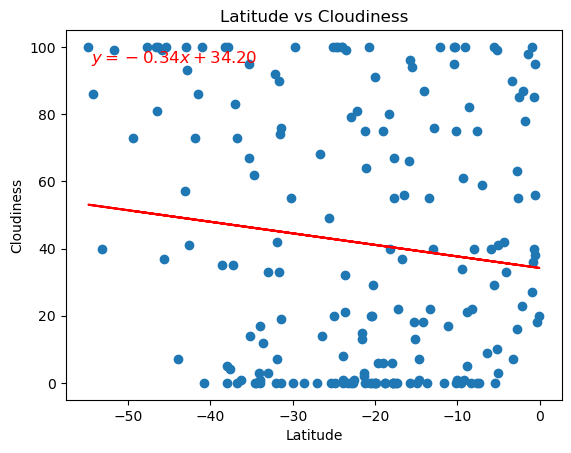

In [115]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Cloudiness']

plot_linear_regression(x_values, y_values, 'Latitude', 'Cloudiness', "Latitude vs Cloudiness")

**Discussion about the linear relationship:**
The relationship between latitude and cloudiness in both the Northern and Southern Hemispheres shows a very weak negative correlation. In the Northern Hemisphere, the regression equation y=−0.29x+56.09 with an R-squared value of 0.0189 suggests a slight decrease in cloudiness with increasing latitude, but the correlation is very weak. Similarly, in the Southern Hemisphere, the equation y=−0.34x+34.20 with an R-squared value of 0.0150 also indicates a slight decrease in cloudiness with increasing latitude. However, the low R-squared values in both cases imply that latitude is not a strong predictor of cloudiness, and other factors likely have a more significant impact on cloudiness levels in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.028128006402457766


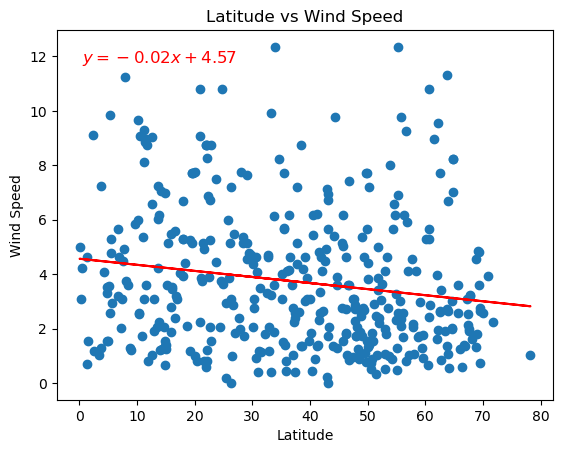

In [116]:
# Northern Hemisphere
x_values = northern_hemisphere_df['Lat']
y_values = northern_hemisphere_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', "Latitude vs Wind Speed")

The r^2 value is: 0.07255085380800828


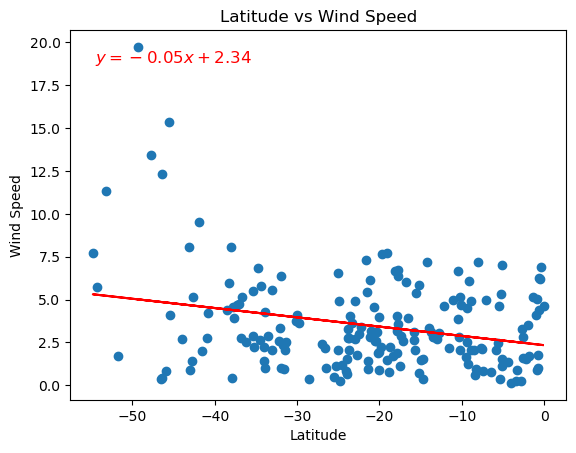

In [117]:
# Southern Hemisphere
x_values = southern_hemisphere_df['Lat']
y_values = southern_hemisphere_df['Wind Speed']

plot_linear_regression(x_values, y_values, 'Latitude', 'Wind Speed', "Latitude vs Wind Speed")

**Discussion about the linear relationship:**
The relationship between latitude and wind speed in both hemispheres shows a weak negative correlation, as indicated by the linear regression analyses. In the Northern Hemisphere, the equation y=−0.02x+4.57 with an R-squared value of 0.0281 suggests a slight decrease in wind speed with increasing latitude. Similarly, in the Southern Hemisphere, the equation y=−0.05x+2.34 with an R-squared value of 0.0726 also indicates a slight decrease in wind speed as latitude increases. Despite these trends, the low R-squared values in both hemispheres imply that latitude is not a strong predictor of wind speed, and other environmental factors likely have a more significant influence on wind speed variations.